In [1]:
# Import the Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df_original = pd.read_csv("Student Depression Dataset.csv")

#  Display the first 5 rows of the data
print("First 5 rows of the dataset:")
display(df_original.head())

# Display dataset summary
print("Dataset info:")
df_original.info()

First 5 rows of the dataset:


id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours       Moderate      BCA   
4          5-6 hours       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  o

**Step 03 - Normalization / Scaling**

In [4]:
# Import the Libraries
from sklearn.preprocessing import StandardScaler

# Remove outliers
for col in ['Age', 'CGPA']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Data has been reset and cleaned.")

Data has been reset and cleaned.


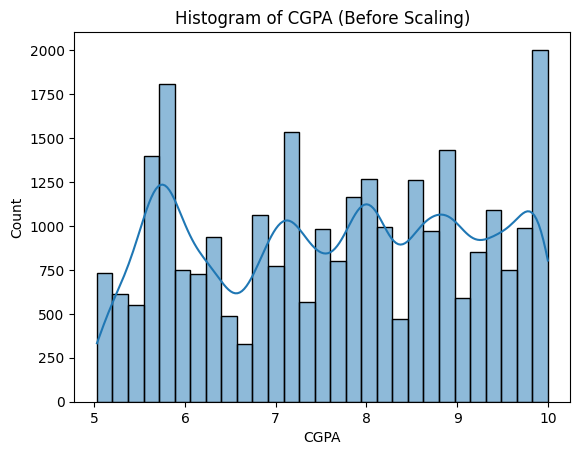

Descriptive Statistics for CGPA (Before Scaling):
count    27880.000000
mean         7.658626
std          1.464599
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64


In [5]:
# Plot the histogram
sns.histplot(data=df, x='CGPA', kde=True)
plt.title('Histogram of CGPA (Before Scaling)')
plt.show()

# Display summary statistics
print("Descriptive Statistics for CGPA (Before Scaling):")
print(df['CGPA'].describe())

In [6]:
# Apply Scaling
columns_to_scale = [
    'Academic Pressure', 'Work Pressure', 'Study Satisfaction',
    'Job Satisfaction', 'Financial Stress', 'CGPA', 'Work/Study Hours'
]
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("Numeric features have been successfully standardized.")

Numeric features have been successfully standardized.


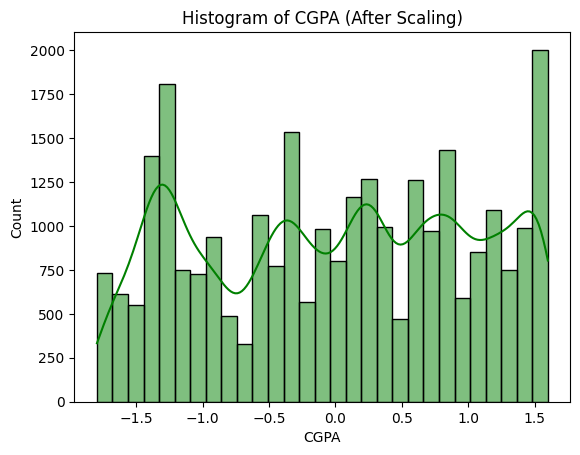

Descriptive Statistics for CGPA (After Scaling):
count    2.788000e+04
mean     1.070402e-17
std      1.000018e+00
min     -1.794808e+00
25%     -9.344884e-01
50%      7.604541e-02
75%      8.612575e-01
max      1.598674e+00
Name: CGPA, dtype: float64


In [7]:
# Plot the histogram
sns.histplot(data=df, x='CGPA', kde=True, color='green')
plt.title('Histogram of CGPA (After Scaling)')
plt.show()

# Display summary statistics
print("Descriptive Statistics for CGPA (After Scaling):")
print(df['CGPA'].describe())